#### The goal is to use the Random Forest Classification algorithm to obtain results for the different attack types found in the KDDcup99 dataset. The results are to be displayed in the form of a plot with varying values for the depth of the decision trees. 

In [1]:
from sklearn.datasets import fetch_kddcup99
import numpy as np

# Import 10% of the entire kddcup99 dataset
kdd99_data = fetch_kddcup99()
X = kdd99_data['data']
y = kdd99_data['target']

print(X.shape)
print(y.shape)

(494021, 41)
(494021,)


Not many of the different attack types are present within the http subset. I wanted to use a subset that contains more attack types to better understand how well the Random Forest Classifier algorithm performs. This reason, in tandem with the fact that the dataset is very large, is why I have chosen to use 10% of the entire dataset. One benefit of using the http dataset was that it only had 3 features. By taking my own sample, the number of features increases. While this is not ideal, the variability in the attack types is better than in the http subset. Perhaps I can add feature selection to this program at a later time. 

In [2]:
# Remove categorical data from X
X_num_sample = np.delete(X,[1,2,3],1)
print(X_num_sample.shape)
print(y.shape)

print(X[0:100])

(494021, 38)
(494021,)
[[0 b'tcp' b'http' ... 0.0 0.0 0.0]
 [0 b'tcp' b'http' ... 0.0 0.0 0.0]
 [0 b'tcp' b'http' ... 0.0 0.0 0.0]
 ...
 [0 b'tcp' b'http' ... 0.0 0.0 0.0]
 [0 b'tcp' b'http' ... 0.0 0.0 0.0]
 [0 b'tcp' b'http' ... 0.0 0.0 0.0]]


The original kddcup99 dataset contains both categorical and numerical data. It is necessary to remove the categorical data at this time, because the algorithm used later on requires numerical input. As it can be seen, the number of examples in X stays at 494,021 and the number of features reduces from 41 to 38 and is now saved in X_num_sample. Below you can find a printout of the first sample of X_num_sample, which shows all 38 features. This is a good check to make sure that categorical features were not missed. 

In [3]:
# Make sure all categorical columns were removed
X_num_sample[0:1]

array([[0, 181, 5450, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8,
        8, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 9, 9, 1.0, 0.0, 0.11, 0.0,
        0.0, 0.0, 0.0, 0.0]], dtype=object)

All categorical features were successfully removed from the dataset. Next, the target variables will be manipulated so that they are also represented by numerical values. In this case, each individual attack type is given its own class. I tried to use scikit-learn's label encoder, though this approach proved to be inefficent. This is due to the fact that only a small percentage of the entire dataset is being used and not all attack types exist in each sample. Therefore, if the algorithm is trained using a sample, some of the types may be unaccounted for. Hard-coding the classes resolves this issue, though it may seem a bit exessive.  

In [4]:
print(y[0:50])

[b'normal.' b'normal.' b'normal.' b'normal.' b'normal.' b'normal.'
 b'normal.' b'normal.' b'normal.' b'normal.' b'normal.' b'normal.'
 b'normal.' b'normal.' b'normal.' b'normal.' b'normal.' b'normal.'
 b'normal.' b'normal.' b'normal.' b'normal.' b'normal.' b'normal.'
 b'normal.' b'normal.' b'normal.' b'normal.' b'normal.' b'normal.'
 b'normal.' b'normal.' b'normal.' b'normal.' b'normal.' b'normal.'
 b'normal.' b'normal.' b'normal.' b'normal.' b'normal.' b'normal.'
 b'normal.' b'normal.' b'normal.' b'normal.' b'normal.' b'normal.'
 b'normal.' b'normal.']


In [5]:
# Assign each attack type to a numerical representation of that type
for i in range(X.shape[0]):
  
    if(y[i]==b'normal.'):
        y[i] = 0

    if(y[i]==b'neptune.'):
        y[i] = 1
        
    if(y[i]==b'smurf.'):
         y[i] = 2
        
    if(y[i]==b'pod.'):
         y[i] = 3
    
    if(y[i]==b'teardrop.'):
         y[i] = 4
        
    if(y[i]==b'land.'):
         y[i] = 5
        
    if(y[i]==b'back.'):
         y[i] = 6

    if(y[i]==b'buffer_overflow.'): 
         y[i] = 7
    
    if(y[i]==b'loadmodule.'):
         y[i] = 8
       
    if(y[i]==b'perl.'): 
         y[i] = 9
    
    if(y[i]==b'rootkit.'): 
         y[i] = 10
    
    if(y[i]==b'guess_passwd.'):
         y[i] = 11
    
    if(y[i]==b'ftp_write.'):
         y[i] = 12
    
    if(y[i]==b'imap.'):
         y[i] = 13
    
    if(y[i]==b'phf.'):
         y[i] = 14
    
    if(y[i]==b'multihop.'): 
         y[i] = 15
    
    if(y[i]==b'warezmaster.'):
         y[i] = 16
    
    if(y[i]==b'warezclient.'):
         y[i] = 17
    
    if(y[i]==b'spy.'):
         y[i] = 18
       
    if(y[i]==b'portsweep.'):
         y[i] = 19
    
    if(y[i]==b'ipsweep.'):
         y[i] = 20
        
    if(y[i]==b'nmap.'): 
         y[i] = 21
        
    if(y[i]==b'satan.'):
         y[i] = 22

In [6]:
y = np.int64(y)
print(y[40700:40800])
print(set(y))
print(type(y))

[ 6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6  6 13
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0]
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22}
<class 'numpy.ndarray'>


Printing 100 values from the y array confirms that the y array was successfully changed to numerical representations of the categorical attack types. The set of y is also printed, showing that all 23 types have been accounted for. Next, the data will be split into training and testing subsets. 

In [7]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_num_sample, y, test_size=0.33, random_state=42, stratify = y)

In [8]:
print(set(y_train))
print(set(y_test))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22}
{3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22}


Here, it can be seen that attack types 14 and 18 were present in the training subset, but were not present in the testing subset. Below, the training subset is used to train the Random Forest Classifier model. The classifier then uses what it learned to predict which points in the X_test subset belong to each attack type. Those predictions are stored in y_pred. For this example an arbitrary value of 50 is used for the number of splits in each tree, which is denoted by the max_depth parameter. The effects of this parameter will be addressed later on. 

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
clf = RandomForestClassifier(max_depth = 50, random_state = 42)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
y_pred = np.array(y_pred)

Next, a confusion matrix and classification report will be produced to better understand how well the Random Forest Classifier algorithm performed. The y_test subset contains the true attack types of X_test and is compared against y_pred, which is what the algorithm predicted the attack types of X_test to be. 

In [10]:
from sklearn import metrics

# Print the confusion matrix
print(metrics.confusion_matrix(y_test, y_pred))

# Print the precision and recall, and other metrics
print(metrics.classification_report(y_test, y_pred, digits=3))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0  30   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0 109   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   3   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0 245   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   4   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0
    0]
 [  0   0   0   0   0   0   0   0   6   0   0   0   0   0   0   0   0   0
    0]
 [  0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0   0   2   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   1   

c:\users\kajia\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\kajia\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


I am still confused as to why the warning still appears for Precision and F-score being ill-defined. Confusion matricies and the classification report are supposed to work well to evaluate multiclass classifiers because the report calculates the per-class precision and recall and then combines all of them for an overall score. However, it is important to note that F1 scores are not necessarily ideal to compare these kinds of classifiers[23]. I tried using a different method below, but discovered that it is essentially the exact same thing, and that I even get the same scores. 

In [11]:
from sklearn.metrics import precision_recall_fscore_support as score
precision,recall,fscore,support=score(y_test,y_pred,average='macro')
print('Precision : {}'.format(precision))
print('Recall    : {}'.format(recall))
print('F-score   : {}'.format(fscore))
print('Support   : {}'.format(support))

Precision : 0.7171506101896593
Recall    : 0.7321175242609727
F-score   : 0.7227827232837072
Support   : None


Using the method above, I can select individual scores. This allows me to make an array of scores, which will allow the data to be plotted as the depth value changes.

In [12]:
recall_scores = []
precision_scores = []
f1_scores = []


def calculations(n):
    
    clf = RandomForestClassifier(max_depth = n, random_state = 42)
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    y_pred = np.array(y_pred)
    
    precision,recall,fscore,support=score(y_test,y_pred,average='macro')
    
    recall_scores.append(recall)
    precision_scores.append(precision)
    f1_scores.append(fscore)


In [ ]:
ilist = []
i = 5
while i<320:
    calculations(i)
    ilist.append(i)
    i=i*2

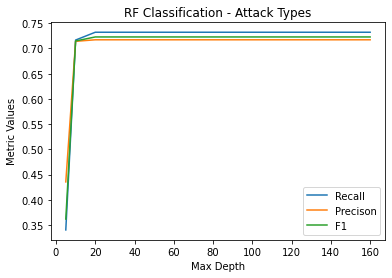

In [14]:
    import matplotlib.pyplot as plt
    plt.plot(ilist, recall_scores, label='Recall')
    plt.plot(ilist, precision_scores, label='Precison')
    plt.plot(ilist, f1_scores,label='F1')
    
    plt.xlabel('Max Depth')
    plt.ylabel('Metric Values')
    plt.title('RF Classification - Attack Types')
    
    leg = plt.legend();

    plt.show()

In [15]:
ilist

[5, 10, 20, 40, 80, 160]

I need to troubleshoot more to figure out why precision and f1 score are ill-defined. My understanding is that at some point in time the equation used to calculate these values is attempting to divide by zero, albeit I am unsure as to why because the denominator of the precision equation is true positives + false positives and should not equal zero. By analyzing the results that I did get, I would say that the data (although potentially incorrect) is showing that 20 is the ideal number of splits to use for the random forest classifier when using all 38 features. However, it would be beneficial to use feature selection and reduce the dimensionality in a way that selects the features that have the most impact on which attack type each instance is. 